Jacobi and Gauss-Seidel Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    error = []
    
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
            
        error.append(np.linalg.norm(x_new - x, ord=np.inf))
        
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, error
        x = x_new
    return x, max_iterations, error
    
    
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    error = []
    
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
            
        error.append(np.linalg.norm(x_new - x, ord=np.inf))
            
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, error
        x = x_new
    return x, max_iterations, error

In [3]:
A = np.array([[3., -0.1, -0.2],
              [0.1, 7., -0.3],
              [0.3, -0.2, 10.]])
b = np.array([7.85, -19.3, 71.4])
x0 = np.zeros(3)
max_iterations = 100
tol = np.array([1e-3, 1e-6, 1e-9])

sol_jacobi = np.zeros((3, 3))
it_jacobi = np.zeros(3)
error_jacobi = []

sol_gauss = np.zeros((3,3))
it_gauss = np.zeros(3)
error_gauss = []

In [4]:
# Jacobi
print("Jacobi Method:\n")
for i in range (3):
    sol_jacobi[i], it_jacobi[i], error_jacobi = jacobi(A, b, x0, tol[i], max_iterations)
    print("Solution: with tolerance =", tol[i], "\n", sol_jacobi[i,:], "\n", "Iterations:", it_jacobi[i], "\n")

# Gauss-Seidel
print("Gauss-Seidel Method:\n")
for j in range (3):
    sol_gauss[j], it_gauss[j], error_gauss = gauss_seidel(A, b, x0, tol[j], max_iterations)
    print("Solution: with tolerance =", tol[j], "\n", sol_gauss[j,:], "\n", "Iterations:", it_gauss[j], "\n")

Jacobi Method:

Solution: with tolerance = 0.001 
 [ 3.0000225  -2.50000266  6.99998104] 
 Iterations: 3.0 

Solution: with tolerance = 1e-06 
 [ 3.  -2.5  7. ] 
 Iterations: 6.0 

Solution: with tolerance = 1e-09 
 [ 3.  -2.5  7. ] 
 Iterations: 8.0 

Gauss-Seidel Method:

Solution: with tolerance = 0.001 
 [ 3.00000035 -2.50000004  6.99999999] 
 Iterations: 3.0 

Solution: with tolerance = 1e-06 
 [ 3.  -2.5  7. ] 
 Iterations: 4.0 

Solution: with tolerance = 1e-09 
 [ 3.  -2.5  7. ] 
 Iterations: 6.0 



The Gauss-Seidel Method and Jacobi Method required the same number of iterations to converge when the tolerance was 1e-3, and Gauss-Seidel required less iterations for smaller tolerances.

Text(0, 0.5, 'Error')

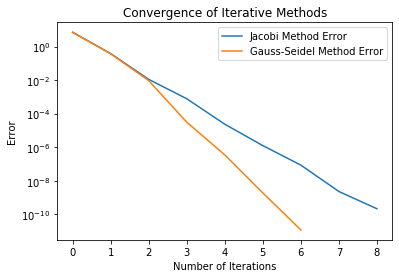

In [5]:
plt.semilogy(error_jacobi, label='Jacobi Method Error')
plt.semilogy(error_gauss, label='Gauss-Seidel Method Error')
plt.legend()
plt.title('Convergence of Iterative Methods')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')

The above plot demonstrates that the error decreases as the number of iterations increases.

Larger tolerances require less iterations to converge because there is a "greater range" of valid solutions. Meanwhile, smaller tolerances require more iterations in order for iterative methods to converge closer to the actual solution.

cite source: I asked Google Gemini "how to plot convergence in python," and used the given function "plt.semilogy" with my 2 errors in order to create my graph.

I googled "similar c++ pushback in python" and Gemini responded with information about "appending lists" in Python instead of using arrays, which I used to store my error values for each iteration.